## Vincent Roy
**ID : 119244546**

## Assignment #4

In [35]:
# import all of the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import *

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV, Lasso


from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from IPython.display import Image
from sklearn.externals.six import StringIO  
import pydotplus

from sklearn.model_selection import cross_val_score, cross_val_predict

import graphviz

import scipy.stats  as ss

import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

### Step 1 - Load the data

In [36]:
filename = 'assignment04_b.csv'
data = pd.read_csv(filename,encoding = "ISO-8859-1")

### Step 2 - Describe the data

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [38]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.320132,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.592299,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Step 3 - Transform the data

In the following section the the categorical variables are transformed to binary values on for each category

In [39]:
# create a onehot_encoder object that will trnasform a categorical column to a series of binary columns
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')

In [40]:
# transform the cp column

# get the column cp and drop it from the dataframe
cp = data['cp'].values.reshape(-1, 1)
data = data.drop(labels=['cp'],axis=1)

# convert the categories into binary columns
onehot_cp = onehot_encoder.fit_transform(cp);

# add back into the dataframe the cp converted data
data = pd.concat([data,pd.DataFrame(onehot_cp,columns=['cp0','cp1','cp2','cp3'])],axis=1)


In [41]:
# transform the restecg column

# get the column restecg and drop it from the dataframe
restecg = data['restecg'].values.reshape(-1, 1)
data = data.drop(labels=['restecg'],axis=1)

# convert the categories into binary columns
onehot_restecg = onehot_encoder.fit_transform(restecg);

# add back into the dataframe the restecg converted data
data = pd.concat([data,pd.DataFrame(onehot_restecg,columns=['rest0','rest1','rest2'])],axis=1)



In [42]:
# transform the slope column

# get the column slope and drop it from the dataframe
slope = data['slope'].values.reshape(-1, 1)
data = data.drop(labels=['slope'],axis=1)

# convert the categories into binary columns
onehot_slope = onehot_encoder.fit_transform(slope);

# add back into the dataframe the slope converted data
data = pd.concat([data,pd.DataFrame(onehot_slope,columns=['slope0','slope1','slope2'])],axis=1)


In [43]:
# transform the thal column

# get the thal column and drop it from the dataframe
thal = data['thal'].values.reshape(-1, 1)
data = data.drop(labels=['thal'],axis=1)

# convert the categories into binary columns
onehot_thal = onehot_encoder.fit_transform(thal);

# add back into the dataframe the thal converted data
data = pd.concat([data,pd.DataFrame(onehot_thal,columns=['thal1','thal2','thal3'])],axis=1)


#### Step 5 - Plot the correlation data

In [44]:
# get the correlation matrix for all of the data
cor = data.corr()

<Figure size 360x360 with 0 Axes>

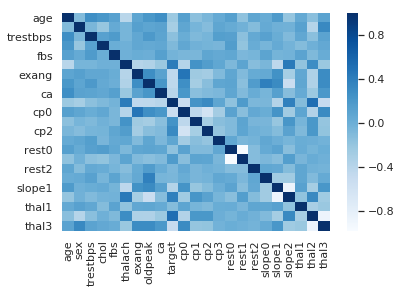

In [45]:
# plot the correlation matrix
plt.figure(figsize=(5,5));
fig, ax = plt.subplots();
sns.heatmap(cor,cmap="Blues");


In [46]:
# get only the target column from the correlation matrix
corTarget = cor['target'].abs()
corTarget = corTarget.drop(labels='target',axis=0)

# sort the values and create as a dataframe
corTarget = corTarget.sort_values(ascending=False)
corTarget = pd.DataFrame(corTarget)


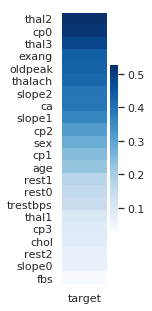

In [47]:
# create a heamap for the correlation values with the target variable
plt.figure(figsize=(1,5));
sns.heatmap(corTarget,cmap="Blues");

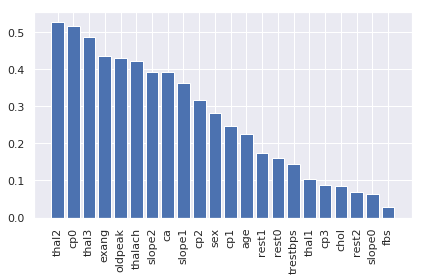

In [48]:
# create a bar chart for the correlation values with the target variable
plt.bar(corTarget.index, corTarget['target'])
plt.xticks(rotation='vertical')
plt.tight_layout();

#### Step 6 - Plot the boxplots and the histograms of the highly correlated variables with the target variable

In [49]:
# get the top 6 correlation values
top6vars = corTarget.head(6).index

In [50]:
# get the data with only positive and negative results
data0 = data[data['target'] == 0]
data1 = data[data['target'] == 1]

data0.shape
data1.shape

(165, 23)

In [51]:
def boxComp(variable):
    """
    Function to create boxplots and histograms for a specific variable from the data sey
    """
    
    # make a title
    fig = plt.figure()
    fig.suptitle(variable, fontsize=16)
 
    # calavulate the range of the values for the variable
    delta = data[variable].max() - data[variable].min()
    
    # calculate the min and the max values for the box plot
    min = data[variable].min() - delta*0.1
    max = data[variable].max() + delta*0.1
    
    # boxplot for all the values of the variable
    plt.subplot(2,3,1)
    plt.boxplot(data[variable])
    plt.ylim(min,max)
    plt.xlabel('All');
    
    # boxplot for the negative values
    plt.subplot(2,3,2)
    plt.boxplot(data0[variable]);
    plt.xlabel('No disease');
    plt.ylim(min,max)
    
    # boxplot for the positive values
    plt.subplot(2,3,3)
    plt.boxplot(data1[variable]);
    plt.ylim(min,max)
    plt.xlabel('Disease');
    
    # histogram of all the data for the variable
    plt.subplot(2,3,4)
    plt.hist(data[variable]);
    
    # histogram for only the negative
    plt.subplot(2,3,5)
    plt.hist(data0[variable]);
    
    # histogram for only the positive
    plt.subplot(2,3,6)
    plt.hist(data1[variable]);
    
    plt.tight_layout();
    
      

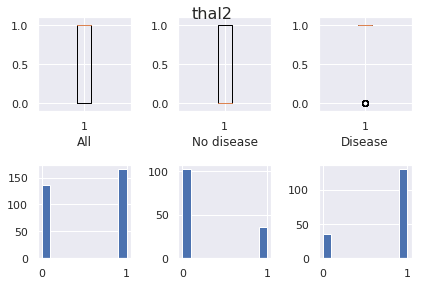

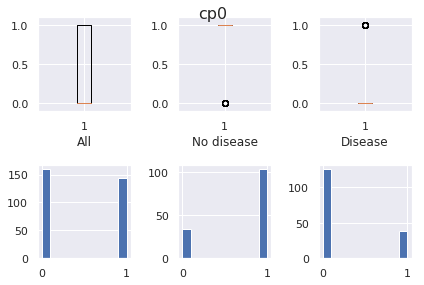

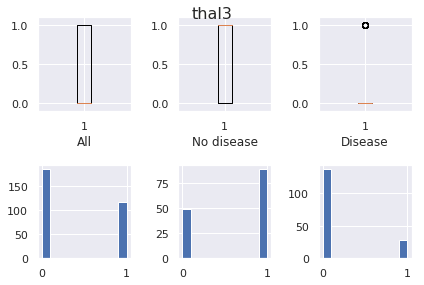

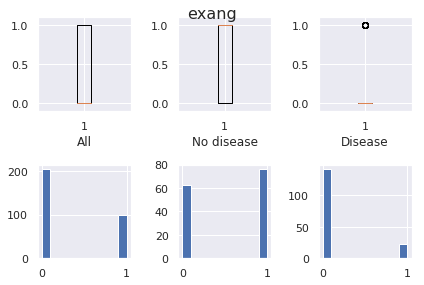

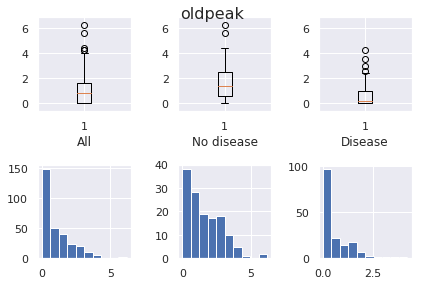

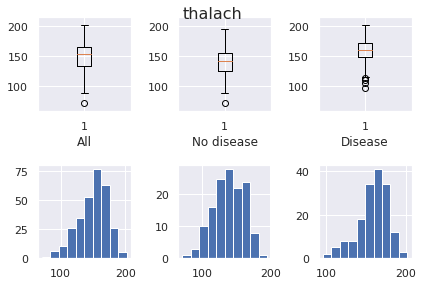

In [52]:
# create the combined plots for the top 6 correlation varaibles
for i in top6vars:
    
    boxComp(i)

In [53]:
# drop the unnecessary dummy variables
data = data.drop(labels=['cp3'],axis=1)
data = data.drop(labels=['rest2'],axis=1)
data = data.drop(labels=['slope2'],axis=1)
data = data.drop(labels=['thal3'],axis=1)


#### Step 7 - Prep the data for the modeling

In [54]:
# get the target column and drop it from the dataframe
y = data['target'].values
data = data.drop(labels=['target'],axis=1)

In [55]:
# get the names for all of the columns
colNames = data.columns.values

In [56]:
# get the feature values from the dataframe
X = data.values
XX = X

In [57]:
# standardize the data for modeling
stdX = StandardScaler()
X = stdX.fit_transform(X)

#### Step 8 - Model the data

In [58]:
# create differnt values for the regularization constant
cValues = np.linspace(0.5, 0.001, num=200)

In [59]:
# create an empty data frame  store the results
results = pd.DataFrame(columns=['CValue','AvgPrecision'])

# model for each regularization value
for c in cValues:

    # create the model
    model = LogisticRegression(penalty='l1',C=c,solver='liblinear');

    # calculate the score result of the model using 10 fold cross validation
    scores = cross_val_score(model, X, y,scoring='accuracy', cv=10)

    # get the average score
    avgPrecision = scores.mean()
    
    # add the results of the model
    results = results.append({'CValue':c,'AvgPrecision':avgPrecision},ignore_index=True)
    

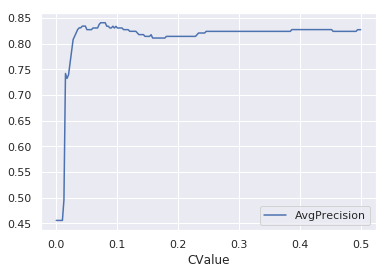

In [60]:
results.plot('CValue','AvgPrecision');

In [61]:
results.head()

,CValue,AvgPrecision
0,0.500000,0.827086
1,0.497492,0.827086
2,0.494985,0.827086
3,0.492477,0.823860
4,0.489970,0.823860


In [62]:
# create the model for the specif C value of the model
model = LogisticRegression(penalty='l1',C=0.03,solver='liblinear');

t = model.fit(X,y)

# get the coefficents of the model
coef = t.coef_
coef = coef.round(decimals=1)
coef = pd.DataFrame(coef,columns=colNames)

# transpose, get the absolute value and sort the coeficients of the model
coef = coef.transpose()
coef = coef.abs() + 0
coef = coef.sort_values(by=0,ascending=False)
coef.columns = ['beta']
coef


,beta
cp0,0.4
thal2,0.4
ca,0.2
thalach,0.1
exang,0.1
oldpeak,0.1
trestbps,0.0
chol,0.0
fbs,0.0
sex,0.0


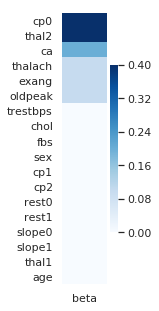

In [63]:
# create a heat map of the model coeficients
plt.figure(figsize=(1,5));
sns.heatmap(coef,cmap="Blues");

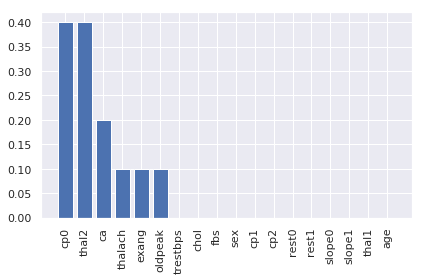

In [64]:
# create a bar chart of the model coeficients
plt.bar(coef.index, coef.values[:,0])
plt.xticks(rotation='vertical')
plt.tight_layout();

In [65]:
# create a decision tree with bagging
tree = DecisionTreeClassifier(max_depth = 2)
bag = BaggingClassifier(tree, n_estimators=100,random_state=1)

# get the score of the model
scores = cross_val_score(bag, XX, y,scoring='recall', cv=10)
avgPrecision = scores.mean()
avgPrecision

0.8893382352941177

In [66]:
# fit a descision tree model to the data
t = tree.fit(XX,y)

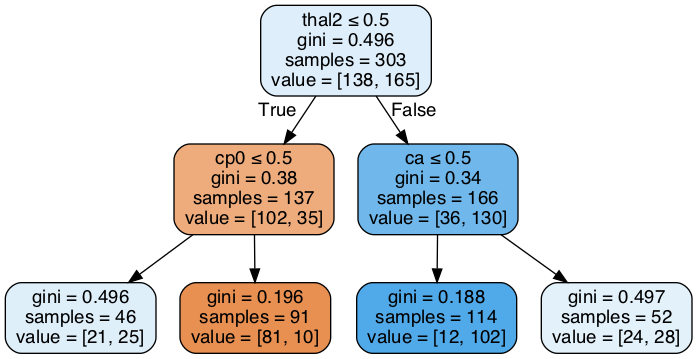

In [67]:
# draw the decision tree
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, feature_names = data.columns,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())